# Data Preparation for classifying Fake News with a Convolutional Neural Network

In [58]:
import collections
import numpy as np
import pandas as pd
import re

from argparse import Namespace
from matplotlib import pyplot as plt

In [59]:
args = Namespace(
    raw_dataset_json="../data/original/News_Category_Dataset_v3.json",
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="../data/processed/News_Category_Dataset_with_splits.csv",
    seed=1337
)

In [60]:
# Read raw data
news = pd.read_json(args.raw_dataset_json, lines=True)

In [61]:
news['text'] = news['headline'] + ". " + news['short_description']
news = news.drop(axis=1, columns=["link", "authors", "date", "headline", "short_description"])

In [62]:
# Splitting train by nationality
# Create dict
by_label = collections.defaultdict(list)
for _, row in news.iterrows():
    by_label[row.category].append(row.to_dict())

In [63]:
# Create split data
final_list = []
np.random.seed(args.seed)
for _, item_list in sorted(by_label.items()):
    np.random.shuffle(item_list)
    n = len(item_list)
    n_train = int(args.train_proportion*n)
    n_val = int(args.val_proportion*n)
    n_test = int(args.test_proportion*n)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
    for item in item_list[n_train+n_val:]:
        item['split'] = 'test'  
    
    # Add to final list
    final_list.extend(item_list)

In [64]:
# Write split data to file
final_news = pd.DataFrame(final_list)

In [65]:
final_news.split.value_counts()

train    146647
test      31470
val       31410
Name: split, dtype: int64

In [66]:
final_news.head()

,category,text,split
0,ARTS,"Buying Art Abroad Is Fun, Bringing It Home May...",train
1,ARTS,Surreal Paintings Reveal The Violent Absurditi...,train
2,ARTS,The Titli Interviews: Filmmaker Kanu Behl in C...,train
3,ARTS,This Venice Biennale Is Dedicated to an Artist...,train
4,ARTS,Reclusive 'Calvin And Hobbes' Creator Returns ...,train


In [67]:
# Write munged data to CSV
final_news.to_csv(args.output_munged_csv, index=False)

,category,text,split,length
0,ARTS,"Buying Art Abroad Is Fun, Bringing It Home May...",train,219
1,ARTS,Surreal Paintings Reveal The Violent Absurditi...,train,77
2,ARTS,The Titli Interviews: Filmmaker Kanu Behl in C...,train,330
3,ARTS,This Venice Biennale Is Dedicated to an Artist...,train,385
4,ARTS,Reclusive 'Calvin And Hobbes' Creator Returns ...,train,57
...,...,...,...,...
209522,WORLDPOST,#TalkToMe: Otavio Canuto and Otaviano Canuto. ...,test,272
209523,WORLDPOST,New Al Qaeda Branch Attacks Wrong Ship.,test,40
209524,WORLDPOST,Liberians Fill Churches In Defiance Of Officia...,test,64
209525,WORLDPOST,'Screaming' Stowaways Found In Shipping Contai...,test,61


<function matplotlib.pyplot.show(close=None, block=None)>

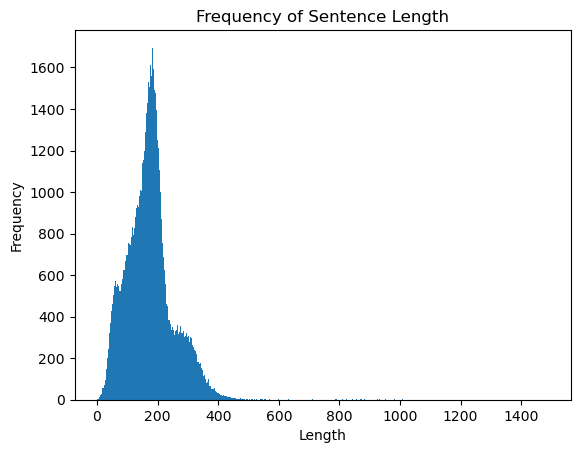

In [68]:
final_news['length'] = final_news['text'].apply(lambda x: len(x))
len_train = final_news.groupby('length').count()

sent_length = len_train.index.tolist()
sent_freq = len_train['text'].tolist()
display(final_news)
# 绘制句子长度及出现频数统计图
plt.bar(sent_length, sent_freq,2)
plt.title("Frequency of Sentence Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show